# Introduction: Predictive Maintenance

Here we try to automatically detect component wear in a machine.

The machine considered is *shrink-wrap packer* for bottles.

The real data comes from a machine of the machine manufacturer *OCME*. Here you can see an image of the machine:

https://www.ocme.com/en/our-solutions/secondary-packaging/vega

The following video on YouTube gives a good impression of what a shrink wrap machine does:

[Vega - OCME Shrink-wrap packers](https://www.youtube.com/watch?v=3oNMJ06EE-0)

At minute 2, you can see one of the blades used.

Here is the dataset at Kaggle:

[One Year Industrial Component Degradation - Degration of a cutting blade](https://www.kaggle.com/inIT-OWL/one-year-industrial-component-degradation)

The data set was also used in the public project [IMPROVE](http://improve-vfof.eu/project/use-cases/ocme/): A failure of the blades with a replacement time of about 4h costs the manufacturer about 13.000€.

# O: Obtain data

## Download data

In [1]:
import urllib.request

file_name = "data_shrink_wrapper_only_mode1.zip"

urllib.request.urlretrieve( f"http://www.juergenbrauer.org/course_data/{file_name}",
                            file_name)

('data_shrink_wrapper_only_mode1.zip',
 <http.client.HTTPMessage at 0x7f2ab188c9d0>)

In [2]:
# -q: quiet
# -o: overwrite existing files
!unzip -q -o $file_name

## Get list of all files in the dataset

In [3]:
from os import listdir
from os.path import isfile, join

folder_name = "data_shrink_wrapper_only_mode1"

list_files = [f for f in listdir(folder_name) if isfile(join(folder_name, f))]

In [4]:
list_files[:10]

['01-05T141105_010_mode1.csv',
 '01-05T141834_014_mode1.csv',
 '02-03T115309_103_mode1.csv',
 '08-08T094646_359_mode1.csv',
 '10-30T095528_462_mode1.csv',
 '02-14T122330_118_mode1.csv',
 '09-19T085710_421_mode1.csv',
 '02-03T112914_102_mode1.csv',
 '07-05T112330_320_mode1.csv',
 '02-03T122317_104_mode1.csv']

In [5]:
len( list_files )

229

## Sort files by filename/date

In [6]:
list_files.sort()

In [7]:
list_files[:10]

['01-04T184148_000_mode1.csv',
 '01-04T184424_001_mode1.csv',
 '01-04T184835_002_mode1.csv',
 '01-04T185047_003_mode1.csv',
 '01-04T185257_004_mode1.csv',
 '01-05T123134_005_mode1.csv',
 '01-05T133345_006_mode1.csv',
 '01-05T133550_007_mode1.csv',
 '01-05T140727_008_mode1.csv',
 '01-05T140919_009_mode1.csv']

In [8]:
list_files[-10:]

['12-10T115528_499_mode1.csv',
 '12-10T123459_500_mode1.csv',
 '12-25T120128_507_mode1.csv',
 '12-25T124201_508_mode1.csv',
 '12-25T132503_509_mode1.csv',
 '12-25T140726_510_mode1.csv',
 '12-25T161546_511_mode1.csv',
 '12-25T163849_512_mode1.csv',
 '12-25T174528_513_mode1.csv',
 '12-25T180856_514_mode1.csv']

# E: Visual exploration of the data

## Visualize one of the sensor time series

In [9]:
file_new_blade = list_files[0]
file_new_blade

'01-04T184148_000_mode1.csv'

In [10]:
file_old_blade = list_files[-1]
file_old_blade

'12-25T180856_514_mode1.csv'

In [11]:
import pandas

t_new = pandas.read_csv( f"{folder_name}/{file_new_blade}")

In [12]:
t_new

,timestamp,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed
0,0.008000,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756
1,0.012000,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756
2,0.016000,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756
3,0.020000,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756
4,0.024000,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756
...,...,...,...,...,...,...,...,...,...
2043,8.179999,0.371901,-0.012508,628403263,-1768.112183,5325580,2748.277588,1.031282,1199.999634
2044,8.183999,0.437352,-0.029764,628403256,-1802.444458,5325591,2763.377930,1.033880,1199.999634
2045,8.187999,0.474551,-0.020807,628403249,-1781.845093,5325602,2803.645752,0.962427,1199.999634
2046,8.191999,0.571133,-0.048983,628403242,-1860.809326,5325613,2823.779541,0.949072,1199.999634


Each file is a ~8 second sample with a time resolution of 4ms that totals 2048 time-samples for every file.

In [13]:
250 * 8

2000

In [14]:
t_new["pCut::Motor_Torque"]

0       0.199603
1       0.281624
2       0.349315
3       0.444450
4       0.480923
          ...   
2043    0.371901
2044    0.437352
2045    0.474551
2046    0.571133
2047    0.525760
Name: pCut::Motor_Torque, Length: 2048, dtype: float64

Wir nehmen jetzt die Python-Bibliothek *Matplotlib* um mal den Verlauf einer der Merkmale über die Zeit zu visualisieren:

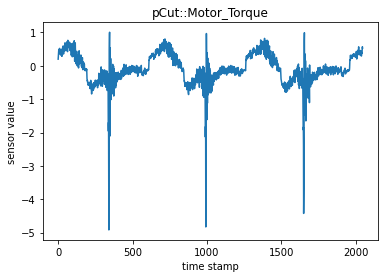

In [15]:
import matplotlib.pyplot as plt

sensor_name = "pCut::Motor_Torque"

plt.plot( t_new[sensor_name] )
plt.xlabel("time stamp")
plt.ylabel("sensor value")
plt.title(sensor_name)
plt.show()

## Visualize all sensor time series

In [16]:
t_new.columns

Index(['timestamp', 'pCut::Motor_Torque',
       'pCut::CTRL_Position_controller::Lag_error',
       'pCut::CTRL_Position_controller::Actual_position',
       'pCut::CTRL_Position_controller::Actual_speed',
       'pSvolFilm::CTRL_Position_controller::Actual_position',
       'pSvolFilm::CTRL_Position_controller::Actual_speed',
       'pSvolFilm::CTRL_Position_controller::Lag_error',
       'pSpintor::VAX_speed'],
      dtype='object')

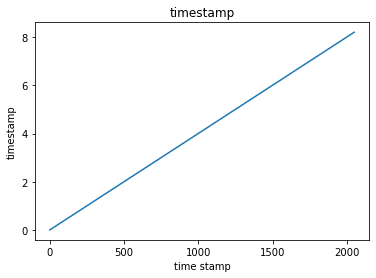

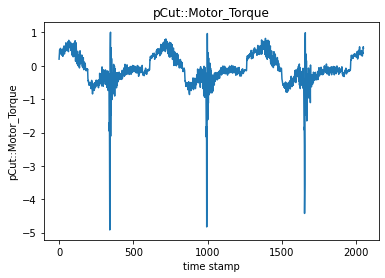

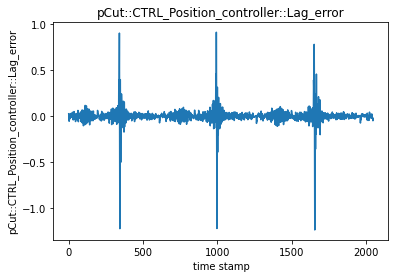

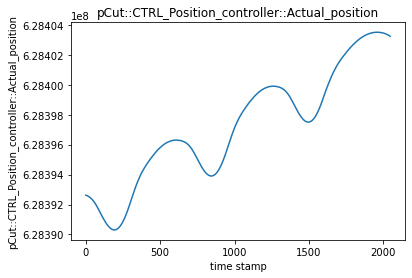

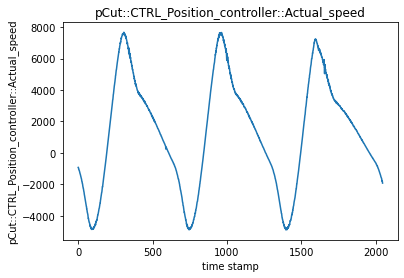

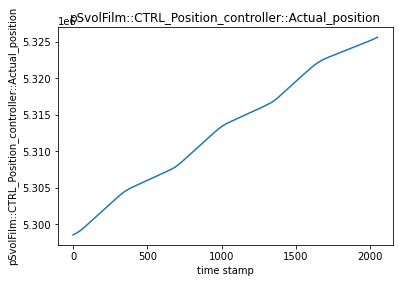

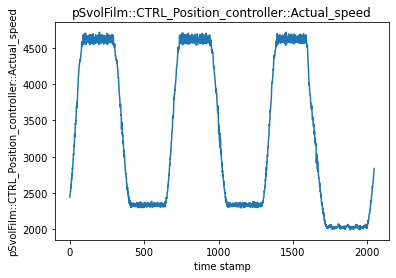

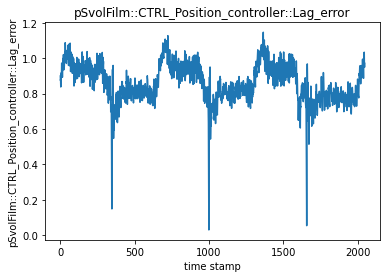

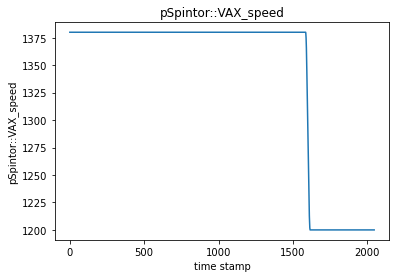

In [17]:
for sensor_name in t_new.columns:    
    plt.plot( t_new[sensor_name] )
    plt.xlabel("time stamp")
    plt.ylabel(sensor_name)
    plt.title(sensor_name)
    plt.show()

## Multiple small figures in one large figure

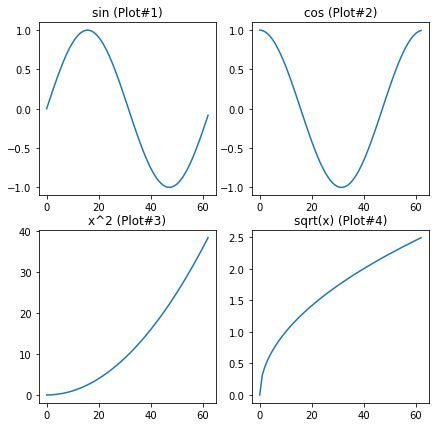

In [18]:
import numpy as np

plt.figure(figsize=(7, 7))

plt.subplot(2, 2, 1)
plt.title("sin (Plot#1)")
plt.plot( [np.sin(x) for x in np.arange(0,2*np.pi,0.1)] )

plt.subplot(2, 2, 2)
plt.title("cos (Plot#2)")
plt.plot( [np.cos(x) for x in np.arange(0,2*np.pi,0.1)] )

plt.subplot(2, 2, 3)
plt.title("x^2 (Plot#3)")
plt.plot( [x**2 for x in np.arange(0,2*np.pi,0.1)] )

plt.subplot(2, 2, 4)
plt.title("sqrt(x) (Plot#4)")
plt.plot( [np.sqrt(x) for x in np.arange(0,2*np.pi,0.1)] )

plt.show()

## Sensor data for a new vs. old blade

In [19]:
file_old_blade

'12-25T180856_514_mode1.csv'

In [20]:
t_old = pandas.read_csv( f"{folder_name}/{file_old_blade}")

In [21]:
t_old

,timestamp,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed
0,0.008000,-0.225135,-0.081835,36056388,6955.718750,91488473,4034.330322,1.387123,1499.999756
1,0.012000,-0.187007,0.013778,36056416,7010.650391,91488489,4107.315430,1.293996,1499.999756
2,0.016000,-0.259524,0.065230,36056444,6863.021484,91488505,4049.430664,0.976738,1499.999756
3,0.020000,-0.424142,0.158631,36056472,6866.455078,91488521,4056.980957,0.773219,1499.999756
4,0.024000,-0.209355,0.120200,36056499,6821.822754,91488537,3812.857422,0.817901,1499.999756
...,...,...,...,...,...,...,...,...,...
2043,8.179999,0.393053,-0.019344,36069412,-1016.235352,91516463,2562.039062,0.871846,1499.999756
2044,8.183999,0.415674,-0.012012,36069408,-1026.535034,91516473,2534.354736,0.924133,1499.999756
2045,8.187999,0.368944,0.001564,36069404,-1050.567627,91516483,2539.388428,0.846560,1499.999756
2046,8.191999,0.328232,0.009434,36069400,-1098.632812,91516493,2526.804688,0.858582,1499.999756


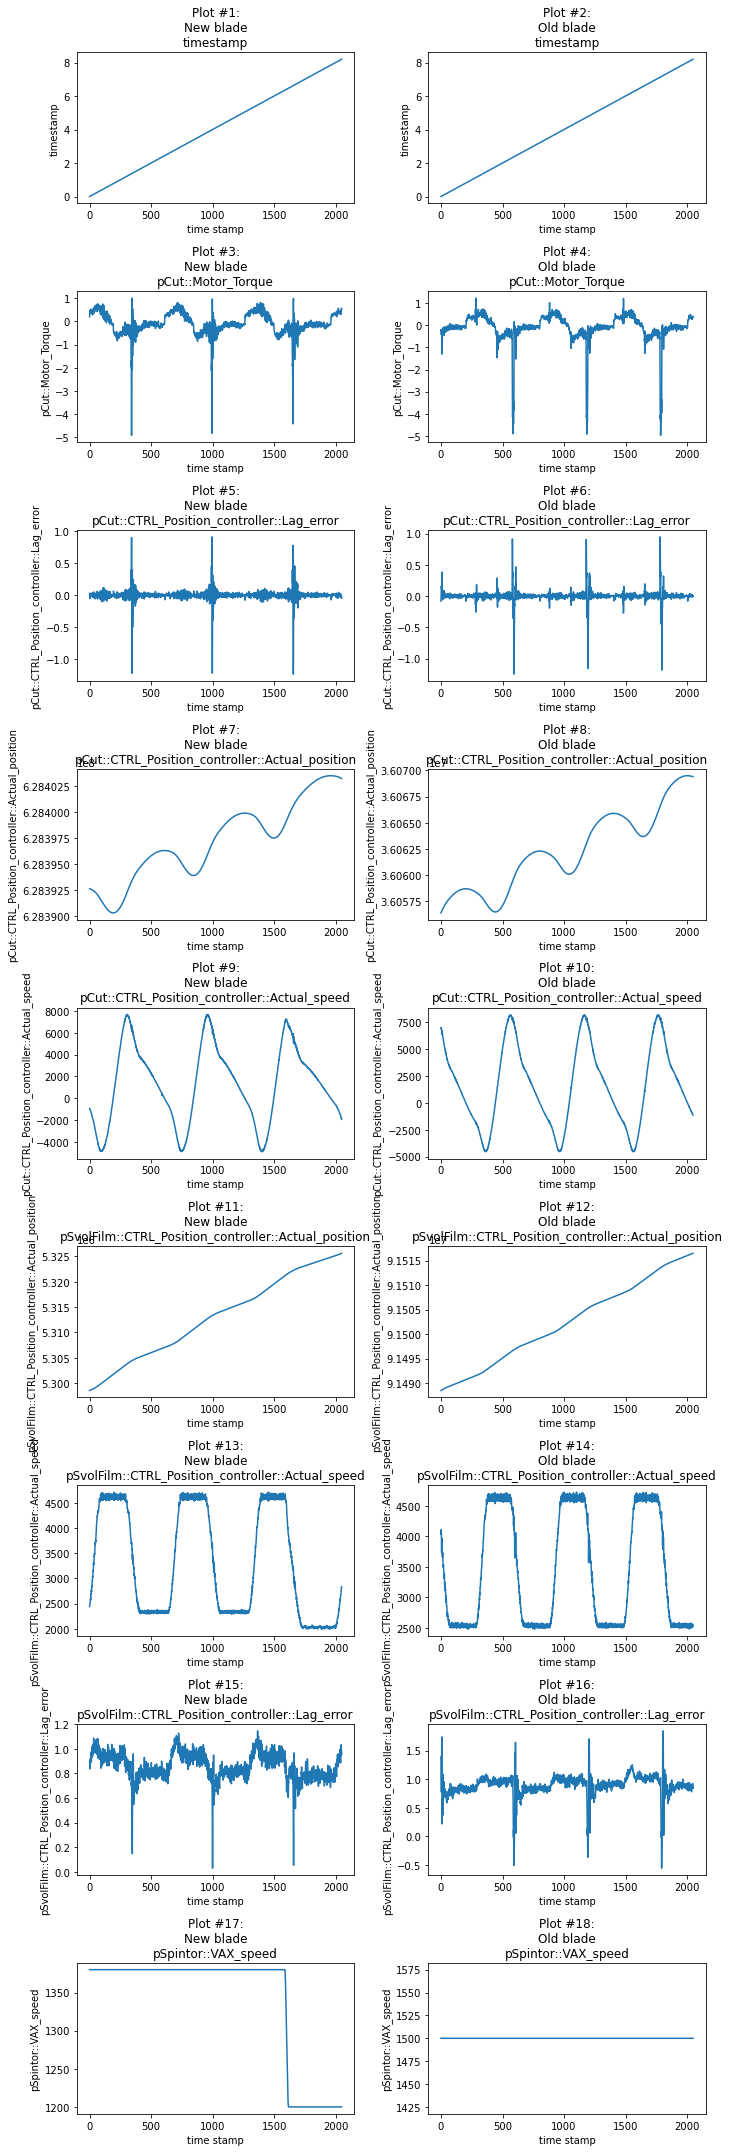

In [22]:
plt.figure(figsize=(10, 30))

nr = 0
for sensor_name in t_new.columns:
    plot_nr = 1+nr*2
    plt.subplot(9, 2, plot_nr)
    plt.plot( t_new[sensor_name] )
    plt.xlabel("time stamp")
    plt.ylabel(sensor_name)
    plt.title( f"Plot #{plot_nr}:\nNew blade\n{sensor_name}" )  
    nr = nr+1
    
nr = 0
for sensor_name in t_old.columns:
    plot_nr = 2+nr*2
    plt.subplot(9, 2, plot_nr)
    plt.plot( t_old[sensor_name] )
    plt.xlabel("time stamp")
    plt.ylabel(sensor_name)
    plt.title( f"Plot #{plot_nr}:\nOld blade\n{sensor_name}" )
    nr = nr+1
    
plt.tight_layout()
plt.show()

## Statistical exploration of one sensor value (LagError)

In [23]:
pandas.options.display.float_format = '{:.5f}'.format
t_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timestamp,2048.00000,4.10200,2.36540,0.00800,2.05500,4.10200,6.14900,8.19600
pCut::Motor_Torque,2048.00000,-0.09800,0.48638,-4.91820,-0.32341,-0.13288,0.27032,1.00611
pCut::CTRL_Position_controller::Lag_error,2048.00000,-0.00004,0.09303,-1.23870,-0.01924,0.00026,0.02011,0.91515
pCut::CTRL_Position_controller::Actual_position,2048.00000,628397221.81934,3781.23009,628390305.00000,628394445.00000,628397506.00000,628399826.75000,628403507.00000
pCut::CTRL_Position_controller::Actual_speed,2048.00000,1293.84563,3486.16446,-4895.78223,-1264.28604,1435.08911,3739.64301,7673.26318
pSvolFilm::CTRL_Position_controller::Actual_position,2048.00000,5312998.18506,7973.94829,5298555.00000,5306143.75000,5313703.50000,5320254.75000,5325625.00000
pSvolFilm::CTRL_Position_controller::Actual_speed,2048.00000,3306.29290,1073.54924,1988.22278,2325.46558,2965.97546,4580.46240,4718.88330
pSvolFilm::CTRL_Position_controller::Lag_error,2048.00000,0.86101,0.10976,0.02962,0.78847,0.85650,0.94370,1.14676
pSpintor::VAX_speed,2048.00000,1340.74334,73.92810,1199.99963,1379.99976,1379.99976,1379.99976,1379.99976


In [24]:
t_old.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timestamp,2048.00000,4.10200,2.36540,0.00800,2.05500,4.10200,6.14900,8.19600
pCut::Motor_Torque,2048.00000,-0.10332,0.65412,-4.97324,-0.25280,-0.06840,0.27261,1.23339
pCut::CTRL_Position_controller::Lag_error,2048.00000,0.00126,0.10109,-1.25017,-0.01534,0.00181,0.01828,0.94829
pCut::CTRL_Position_controller::Actual_position,2048.00000,36062352.62695,3765.57561,36056388.00000,36058669.75000,36062085.50000,36065367.50000,36069497.00000
pCut::CTRL_Position_controller::Actual_speed,2048.00000,1589.30268,3637.34024,-4538.72656,-1281.45218,1426.50604,4283.80933,8232.87891
pSvolFilm::CTRL_Position_controller::Actual_position,2048.00000,91502396.16309,8347.86965,91488473.00000,91495330.50000,91502150.00000,91509037.50000,91516503.00000
pSvolFilm::CTRL_Position_controller::Actual_speed,2048.00000,3422.97343,929.36066,2476.46973,2536.87158,2988.62585,4577.94580,4723.91650
pSvolFilm::CTRL_Position_controller::Lag_error,2048.00000,0.89189,0.18802,-0.55383,0.82877,0.90435,0.98803,1.84331
pSpintor::VAX_speed,2048.00000,1499.99976,0.00000,1499.99976,1499.99976,1499.99976,1499.99976,1499.99976


## Does the average LagError increase over the year?

In [25]:
t_old["pCut::CTRL_Position_controller::Lag_error"].describe()

count   2048.00000
mean       0.00126
std        0.10109
min       -1.25017
25%       -0.01534
50%        0.00181
75%        0.01828
max        0.94829
Name: pCut::CTRL_Position_controller::Lag_error, dtype: float64

In [26]:
t_old["pCut::CTRL_Position_controller::Lag_error"].describe()["mean"]

0.00125643125976563

In [27]:
x = []
y = []

i = 0
for file_name in list_files:
    
    t = pandas.read_csv( f"{folder_name}/{file_name}")
    
    mean_lag_error = t["pCut::CTRL_Position_controller::Lag_error"].describe()["mean"]
    
    x.append( i )
    y.append( mean_lag_error )
    
    i += 1

In [28]:
len(list_files)

229

In [29]:
len(y)

229

In [30]:
y[:10]

[-3.9950234374999716e-05,
 -0.00029946083984375024,
 -2.171538085937529e-06,
 0.00014146028808593756,
 7.623739257812487e-05,
 0.0004480147851562501,
 -0.0005595231542968746,
 -0.00037773941406249906,
 -0.0003832172216796881,
 -0.0005363797753906269]

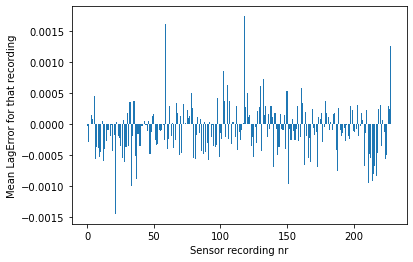

In [31]:
plt.bar( x, y )
plt.xlabel( "Sensor recording nr" )
plt.ylabel( "Mean LagError for that recording" )
plt.show()

# S/M: Preparing data for Machine Learning

Things to do before we can start training a machine learning model:

1. Scale data
2. Prepare target values
3. Shuffle example data
4. Split example data into training and test data

## Exercise: Scaling data with MinMaxScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
data = np.array( [[-1, 2], [-0.5, 6], [0, 10], [1, 18]] )
data

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [34]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [35]:
scaler.data_max_

array([ 1., 18.])

In [36]:
scaler.data_min_

array([-1.,  2.])

In [37]:
scaler.data_range_

array([ 2., 16.])

In [38]:
scaler.transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

## Preparing target values

In [39]:
example_filename = list_files[30]
example_filename

'02-14T132310_119_mode1.csv'

In [40]:
month = example_filename[0:2]
month

'02'

In [41]:
day = example_filename[3:5]
day

'14'

In [42]:
ts = pandas.Timestamp( year=2018, month=int(month), day=int(day) )
ts

Timestamp('2018-02-14 00:00:00')

In [43]:
ts.dayofyear

45

In [44]:
def filename_to_dayofyear(filename):
    month = filename[0:2]
    day   = filename[3:5]
    
    # Error in data set!
    if month=="02" and day == "30":
        day = "28"
           
    ts = pandas.Timestamp( year=2018, month=int(month), day=int(day) )
    return ts.dayofyear

In [45]:
filename_to_dayofyear( "02-01T..." )

32

## Prepare one large data matrix M with input- and output vectors

In [46]:
nr_files = len(list_files)
nr_files

229

In [47]:
t_new.describe()

,timestamp,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed
count,2048.00000,2048.00000,2048.00000,2048.00000,2048.00000,2048.00000,2048.00000,2048.00000,2048.00000
mean,4.10200,-0.09800,-0.00004,628397221.81934,1293.84563,5312998.18506,3306.29290,0.86101,1340.74334
std,2.36540,0.48638,0.09303,3781.23009,3486.16446,7973.94829,1073.54924,0.10976,73.92810
min,0.00800,-4.91820,-1.23870,628390305.00000,-4895.78223,5298555.00000,1988.22278,0.02962,1199.99963
25%,2.05500,-0.32341,-0.01924,628394445.00000,-1264.28604,5306143.75000,2325.46558,0.78847,1379.99976
50%,4.10200,-0.13288,0.00026,628397506.00000,1435.08911,5313703.50000,2965.97546,0.85650,1379.99976
75%,6.14900,0.27032,0.02011,628399826.75000,3739.64301,5320254.75000,4580.46240,0.94370,1379.99976
max,8.19600,1.00611,0.91515,628403507.00000,7673.26318,5325625.00000,4718.88330,1.14676,1379.99976


In [48]:
t_new.describe().values.flatten()

array([ 2.04800000e+03,  2.04800000e+03,  2.04800000e+03,  2.04800000e+03,
        2.04800000e+03,  2.04800000e+03,  2.04800000e+03,  2.04800000e+03,
        2.04800000e+03,  4.10199971e+00, -9.79962931e-02, -3.99502344e-05,
        6.28397222e+08,  1.29384563e+03,  5.31299819e+06,  3.30629290e+03,
        8.61008625e-01,  1.34074334e+03,  2.36540382e+00,  4.86380249e-01,
        9.30273273e-02,  3.78123009e+03,  3.48616446e+03,  7.97394829e+03,
        1.07354924e+03,  1.09759764e-01,  7.39280994e+01,  8.00000000e-03,
       -4.91820240e+00, -1.23869705e+00,  6.28390305e+08, -4.89578223e+03,
        5.29855500e+06,  1.98822278e+03,  2.96161000e-02,  1.19999963e+03,
        2.05499985e+00, -3.23410162e-01, -1.92379875e-02,  6.28394445e+08,
       -1.26428604e+03,  5.30614375e+06,  2.32546558e+03,  7.88474422e-01,
        1.37999976e+03,  4.10199971e+00, -1.32880515e-01,  2.62495000e-04,
        6.28397506e+08,  1.43508911e+03,  5.31370350e+06,  2.96597546e+03,
        8.56501040e-01,  

In [49]:
one_example_input_vector = t_new.describe().values.flatten()
len(one_example_input_vector)

72

In [50]:
nr_rows  = nr_files
nr_cols = 72 + 1

In [51]:
M = np.zeros( (nr_rows, nr_cols) )
M.shape

(229, 73)

In [52]:
i = 0
for file_name in list_files:
    
    t = pandas.read_csv( f"{folder_name}/{file_name}")
    
    input_vec = t.describe().values.flatten()
        
    target_value = filename_to_dayofyear( file_name )
    
    M[i,0:nr_cols-1] = input_vec
    M[i,nr_cols-1]   = target_value
    
    i += 1

In [53]:
M[10]

array([ 2.04800000e+03,  2.04800000e+03,  2.04800000e+03,  2.04800000e+03,
        2.04800000e+03,  2.04800000e+03,  2.04800000e+03,  2.04800000e+03,
        2.04800000e+03,  4.10199971e+00, -9.43548531e-02, -4.55870029e-04,
        6.68200971e+08,  1.62549572e+03,  1.23049747e+07,  4.48666994e+03,
        9.24078689e-01,  1.79999976e+03,  2.36540382e+00,  5.45785554e-01,
        1.22075148e-01,  4.67385381e+03,  4.76100725e+03,  1.04801618e+04,
        1.34705830e+03,  1.42472799e-01,  3.68435315e-11,  8.00000000e-03,
       -6.04466724e+00, -1.38317871e+00,  6.68191904e+08, -6.34117090e+03,
        1.22862400e+07,  2.93451636e+03,  2.81405000e-03,  1.79999976e+03,
        2.05499985e+00, -3.26272467e-01, -2.37670325e-02,  6.68197418e+08,
       -2.11486816e+03,  1.22954220e+07,  3.05028589e+03,  8.36457175e-01,
        1.79999976e+03,  4.10199971e+00, -1.18749075e-01, -9.82755000e-04,
        6.68201084e+08,  1.85394287e+03,  1.23046045e+07,  4.35018091e+03,
        9.18779935e-01,  

In [54]:
M[0].shape

(73,)

## Normalize our example data

In [55]:
M[0]

array([ 2.04800000e+03,  2.04800000e+03,  2.04800000e+03,  2.04800000e+03,
        2.04800000e+03,  2.04800000e+03,  2.04800000e+03,  2.04800000e+03,
        2.04800000e+03,  4.10199971e+00, -9.79962931e-02, -3.99502344e-05,
        6.28397222e+08,  1.29384563e+03,  5.31299819e+06,  3.30629290e+03,
        8.61008625e-01,  1.34074334e+03,  2.36540382e+00,  4.86380249e-01,
        9.30273273e-02,  3.78123009e+03,  3.48616446e+03,  7.97394829e+03,
        1.07354924e+03,  1.09759764e-01,  7.39280994e+01,  8.00000000e-03,
       -4.91820240e+00, -1.23869705e+00,  6.28390305e+08, -4.89578223e+03,
        5.29855500e+06,  1.98822278e+03,  2.96161000e-02,  1.19999963e+03,
        2.05499985e+00, -3.23410162e-01, -1.92379875e-02,  6.28394445e+08,
       -1.26428604e+03,  5.30614375e+06,  2.32546558e+03,  7.88474422e-01,
        1.37999976e+03,  4.10199971e+00, -1.32880515e-01,  2.62495000e-04,
        6.28397506e+08,  1.43508911e+03,  5.31370350e+06,  2.96597546e+03,
        8.56501040e-01,  

In [56]:
input_scaler = MinMaxScaler()
M_scaled = input_scaler.fit_transform(M)

In [57]:
M_scaled[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.5       ,
       0.51222776, 0.44299941, 0.67516088, 0.21393515, 0.00934622,
       0.09803341, 0.28200559, 0.06702082, 1.        , 0.23064308,
       0.29372443, 0.18400343, 0.16197921, 0.09358789, 0.08264043,
       0.03494442, 0.25542756, 0.5       , 0.47019243, 0.40578236,
       0.67516069, 0.78378383, 0.00934134, 0.37099025, 0.64122856,
       0.        , 0.5       , 0.68314311, 0.76278302, 0.67516088,
       0.77085046, 0.00934777, 0.08860764, 0.25773107, 0.08571435,
       0.5       , 0.70055276, 0.61010887, 0.67516093, 0.18297873,
       0.00935159, 0.13303004, 0.26976178, 0.08571435, 0.5       ,
       0.64443513, 0.23129677, 0.67516089, 0.14624953, 0.00934705,
       0.07552603, 0.31051311, 0.08571435, 0.5       , 0.27292769,
       0.40247712, 0.67516103, 0.34968734, 0.00933728, 0.07230086,
       0.05123369, 0.08571435, 0.        ])

## Split example data into input and output

In [58]:
M_scaled.shape

(229, 73)

In [59]:
X = M_scaled[:,0:72]
Y = M_scaled[:,72]

In [60]:
X.shape

(229, 72)

In [61]:
Y.shape

(229,)

## Split input/output data into train and test data

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [63]:
x_train[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.00000000e-01, 4.07988136e-01, 4.71382567e-01,
       6.44302131e-01, 3.97199807e-01, 1.00163013e-02, 2.38046374e-01,
       8.33106825e-01, 2.85714360e-01, 1.00000000e+00, 4.12393014e-01,
       5.69704644e-01, 2.94517818e-01, 4.00631531e-01, 2.40913086e-01,
       1.48124141e-01, 1.14305614e-01, 6.28629027e-14, 5.00000000e-01,
       9.29938527e-02, 1.73490370e-01, 6.44301798e-01, 5.38190364e-01,
       1.00023789e-02, 5.53695946e-01, 6.50811961e-01, 2.85714360e-01,
       5.00000000e-01, 6.06017657e-01, 7.20455263e-01, 6.44301908e-01,
       7.11794698e-01, 1.00127005e-02, 2.90436032e-01, 7.92388971e-01,
       2.85714360e-01, 5.00000000e-01, 7.31171620e-01, 4.36048336e-01,
       6.44302115e-01, 2.85579206e-01, 1.00204826e-02, 2.93539604e-01,
       8.14907440e-01, 2.85714360e-01, 5.00000000e-01, 5.44144883e-01,
      

In [64]:
x_train.shape

(183, 72)

In [65]:
y_train.shape

(183,)

In [66]:
y_train[:5]

array([0.15211268, 0.51267606, 0.15492958, 0.95774648, 1.        ])

In [67]:
x_test.shape

(46, 72)

In [68]:
y_test.shape

(46,)

In [69]:
y_test[:5]

array([0.70704225, 0.45633803, 0.2084507 , 0.30704225, 0.45633803])

In [70]:
print("One example pair: ", x_train[0], "-->", y_train[0])

One example pair:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.00000000e-01 4.07988136e-01 4.71382567e-01
 6.44302131e-01 3.97199807e-01 1.00163013e-02 2.38046374e-01
 8.33106825e-01 2.85714360e-01 1.00000000e+00 4.12393014e-01
 5.69704644e-01 2.94517818e-01 4.00631531e-01 2.40913086e-01
 1.48124141e-01 1.14305614e-01 6.28629027e-14 5.00000000e-01
 9.29938527e-02 1.73490370e-01 6.44301798e-01 5.38190364e-01
 1.00023789e-02 5.53695946e-01 6.50811961e-01 2.85714360e-01
 5.00000000e-01 6.06017657e-01 7.20455263e-01 6.44301908e-01
 7.11794698e-01 1.00127005e-02 2.90436032e-01 7.92388971e-01
 2.85714360e-01 5.00000000e-01 7.31171620e-01 4.36048336e-01
 6.44302115e-01 2.85579206e-01 1.00204826e-02 2.93539604e-01
 8.14907440e-01 2.85714360e-01 5.00000000e-01 5.44144883e-01
 3.28988520e-01 6.44302418e-01 3.30694833e-01 1.00226159e-02
 1.84299162e-01 8.58932095e-01 2.85714360e-01 5.00000000e-01
 2.72

# M: Learning a model (here: using Neural Networks)

## Define a Neural Network using TensorFlow/Keras

In [71]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [72]:
nr_inputs = x_train.shape[1]
nr_inputs

72

In [73]:
nr_outputs = 1
nr_outputs

1

In [74]:
from tensorflow import keras

tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Dense(100,
                             activation="relu",
                             input_shape=(nr_inputs,),
                             name="HiddenLayer1"))
model.add(keras.layers.Dense(nr_outputs,
                             activation="linear",
                             name="OutputLayer"))


model.compile(optimizer='sgd',
              loss=keras.losses.MeanAbsoluteError())

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 100)               7300      
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 101       
Total params: 7,401
Trainable params: 7,401
Non-trainable params: 0
_________________________________________________________________


2021-11-02 10:52:27.924463: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-02 10:52:27.924642: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-02 10:52:27.925445: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Train the Neural Network

In [75]:
x_train.shape

(183, 72)

In [76]:
y_train.shape

(183,)

In [77]:
history = model.fit(x_train,
                    y_train,
                    validation_split=0.1,
                    epochs=200)

2021-11-02 10:52:28.007238: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-02 10:52:28.023704: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2899885000 Hz


Epoch 1/200
6/6 [==============================] - 1s 105ms/step - loss: 0.3804 - val_loss: 0.3158
Epoch 2/200
6/6 [==============================] - 0s 41ms/step - loss: 0.3034 - val_loss: 0.2611
Epoch 3/200
6/6 [==============================] - 0s 31ms/step - loss: 0.2817 - val_loss: 0.2659
Epoch 4/200
6/6 [==============================] - 0s 41ms/step - loss: 0.2676 - val_loss: 0.3508
Epoch 5/200
6/6 [==============================] - 0s 46ms/step - loss: 0.2771 - val_loss: 0.2207
Epoch 6/200
6/6 [==============================] - 0s 27ms/step - loss: 0.2496 - val_loss: 0.2337
Epoch 7/200
6/6 [==============================] - 0s 30ms/step - loss: 0.2371 - val_loss: 0.2794
Epoch 8/200
6/6 [==============================] - 0s 35ms/step - loss: 0.2446 - val_loss: 0.2756
Epoch 9/200
6/6 [==============================] - 0s 26ms/step - loss: 0.2280 - val_loss: 0.3014
Epoch 10/200
6/6 [==============================] - 0s 22ms/step - loss: 0.2238 - val_loss: 0.1806
Epoch 11/200
6/6 [

## Plotting the loss (model error) during the training process

In [78]:
history.history["loss"][:10]

[0.35190853476524353,
 0.29255029559135437,
 0.2750518023967743,
 0.2616012692451477,
 0.26193273067474365,
 0.23933376371860504,
 0.23399312794208527,
 0.23740947246551514,
 0.2185547947883606,
 0.21900375187397003]

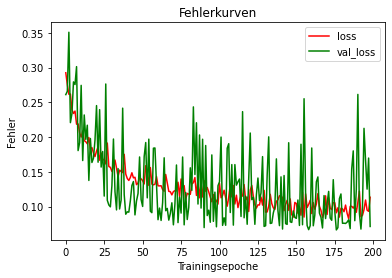

In [79]:
import matplotlib.pyplot as plt
y1 = history.history["loss"][1:]
y2 = history.history["val_loss"][1:]
plt.plot(y1, color="red", label="loss")
plt.plot(y2, color="green", label="val_loss")
plt.xlabel("Trainingsepoche")
plt.ylabel("Fehler")
plt.title("Fehlerkurven")
plt.legend()
plt.show()

# N: Testing the model

## Baseline model

In [80]:
N = x_test.shape[0]

age_predicted = 365/2

sum_errors = 0
for i in range(0,N):
    
    x = x_test[i]
    y = y_test[i]
    
    age_real = y*365
    #print( f"Test example {i}: {age_real} vs. predicted: {age_predicted}" )
    
    error = abs(age_real - age_predicted)
    sum_errors += error
    
baseline_average_error = sum_errors/N
print( f"Average error for baseline approach: {baseline_average_error:.1f} days" )

Average error for baseline approach: 84.2 days


## MLP prediction quality

In [81]:
preds = model.predict( x_test )

In [82]:
preds.shape

(46, 1)

In [83]:
preds[:5]

array([[0.67624587],
       [0.45757896],
       [0.40503004],
       [0.47873372],
       [0.40485457]], dtype=float32)

In [84]:
preds[:10]*365

array([[246.82974 ],
       [167.01633 ],
       [147.83597 ],
       [174.73781 ],
       [147.77191 ],
       [ 75.726616],
       [276.3995  ],
       [ 82.85683 ],
       [ 46.397873],
       [187.95898 ]], dtype=float32)

In [85]:
y_test[:10]*365

array([258.07042254, 166.56338028,  76.08450704, 112.07042254,
       166.56338028,  93.56338028, 265.26760563,  61.69014085,
       100.76056338, 232.36619718])

In [86]:
preds.min()

-0.19050443

In [87]:
preds.max()

0.8713095

In [88]:
N = x_test.shape[0]

sum_errors = 0
for i in range(0,N):
    
    x = x_test[i]
    y = y_test[i]
    
    age_real = y*365
    age_predicted = preds[i][0]*365
    print( f"Test example {i}: {age_real} vs. predicted: {age_predicted}" )
    
    error = abs(age_real - age_predicted)
    sum_errors += error
    
mlp_average_error = sum_errors/N
print( f"Average error for MLP model: {mlp_average_error:.1f} days" )

Test example 0: 258.07042253521126 vs. predicted: 246.82974189519882
Test example 1: 166.56338028169017 vs. predicted: 167.016319334507
Test example 2: 76.08450704225352 vs. predicted: 147.8359653055668
Test example 3: 112.07042253521128 vs. predicted: 174.7378072142601
Test example 4: 166.56338028169017 vs. predicted: 147.77191653847694
Test example 5: 93.56338028169016 vs. predicted: 75.72661519050598
Test example 6: 265.2676056338028 vs. predicted: 276.39949560165405
Test example 7: 61.690140845070424 vs. predicted: 82.85682678222656
Test example 8: 100.7605633802817 vs. predicted: 46.3978710770607
Test example 9: 232.36619718309862 vs. predicted: 187.95898258686066
Test example 10: 303.3098591549296 vs. predicted: 292.5607791543007
Test example 11: 1.028169014084507 vs. predicted: 4.3117531016469
Test example 12: 165.53521126760566 vs. predicted: 97.74840444326401
Test example 13: 30.845070422535215 vs. predicted: 24.512128345668316
Test example 14: 303.3098591549296 vs. predicted:

## How much do we benefit from ML?

In [89]:
reduction_of_prediction_error = (mlp_average_error / baseline_average_error)*100.0

In [90]:
reduction_of_prediction_error

37.8707841414696